## Lab | Inferential statistics - T-test & P-value

In a packing plant, a machine packs cartons with jars. It is supposed that a new machine will pack faster on the average than the machine currently used. To test that hypothesis, the times it takes each machine to pack ten cartons are recorded. The results, in seconds, are shown in the tables in the file files_for_lab/machine.txt. Assume that there is sufficient evidence to conduct the t test, does the data provide sufficient evidence to show if one machine is better than the other

Does the data provide sufficient evidence to show if one machine is better than the other???<br/>

We are using a one tailed t test because we only are interested if the speed of the new machine is higher then the old ones.
So we only need to look at the right end of the curve.

In [14]:
# importing needed libraries

import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import t
from scipy.stats import norm
from scipy.stats import ttest_1samp
from scipy import stats
import math

In [2]:
ls

Untitled.ipynb       machine2.csv         student_gpa.txt
machine.txt          machine2.xlsx        t-test-formular.png


In [3]:
# importing data

data = pd.read_csv('machine2.csv', sep=';')
data

,New machine,Old machine
0,42.1,42.7
1,41.0,43.6
2,41.3,43.8
3,41.8,43.3
4,42.4,42.5
5,42.8,43.5
6,43.2,43.1
7,42.3,41.7
8,41.8,44.0
9,42.7,44.1


### EDA - looking at stats of the data

In [4]:
# sample old = old machine
# sample new = new machine

sample_old_n = len(data)
sample_new_n = len(data)
observations = 20

In [5]:
sample_new_mean = data.mean()['New machine']
sample_new_mean 

42.14

In [6]:
sample_old_mean = data.mean()['Old machine']
sample_old_mean 

43.230000000000004

In [18]:
sample_old_mean - sample_new_mean 

# the old machine is on avg 1 s quicker

# but is this enough to say that the old machine is quicker then the new one?
# is it statistically significant?

1.0900000000000034

In [7]:
sample_new_std = data.std()['New machine']
sample_std

0.6834552736727638

In [8]:
sample_old_std = data.std()['Old machine']
sample_std

0.7498888806572157

In [8]:
data.describe()

,New machine,Old machine
count,10.000000,10.000000
mean,42.140000,43.230000
std,0.683455,0.749889
min,41.000000,41.700000
25%,41.800000,42.800000
50%,42.200000,43.400000
75%,42.625000,43.750000
max,43.200000,44.100000


### Hypothesis Definition

**Null hypothesis - H0:** packing speed of the old and new machine are the same<br/>
speed m_o = speed m_n<br/>

**Alternative hypothesis - Ha:** the new machine has a higher packaging speed<br/>
speed m_o < speed m_n

### Degree of freedom (DOF)

Also, we need the degrees of freedom which is number of samples added and then -2.<br/>

DOF = n1 + n2 - number of samples

In [16]:
# calculating level of freedom for 2 independed samples
dof = (sample_new_n + sample_old_n) - 2
dof

18

### t value/ critical value

- one-tailed test
- alpha level = 0.05
- dof = 18 
<br/><br/>our critical number / t value should be 1.734

In [17]:
sl = 0.95 
#sl = significance level = 100%-alpha

In [20]:
t_value = -1.734
# needs to be negative here as we are looking at less (left tail side)

In [21]:
# computing t value iwth stats from scipy

t_critical = stats.t.ppf(sl,dof)
t_critical

1.7340636066175354

### T-Test (1 tail & 2 independed samples)

one tailed t test referring to t distribution to find cirtical value <br/>
do observations for new machine values, if they fall into the critical area<br/><br/>

p values less then 0.05 (alpha value)

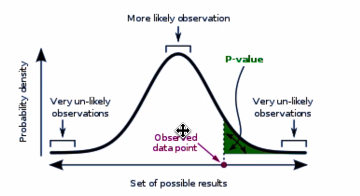

### calculating t stats

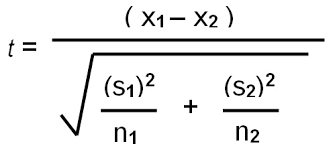

In the formula X1 and X2 are the means of the two populations and S1, S2 are the standard deviations.

In [9]:
data.columns

Index(['New machine', 'Old machine'], dtype='object')

In [10]:
# calculating t statistic step by step manually

s1 = data.std()['New machine']/np.sqrt(sample_n)
s1

0.21612753436596469

In [11]:
s2 = data.std()['Old machine']/np.sqrt(pop_n)
s2

0.2371356854910985

In [12]:
sed = np.sqrt((s1**2) + (s2**2))
sed

0.3208495666888837

In [13]:
# finale t stat
t_stat =(data.mean()['New machine'] - data.mean()['Old machine'])/sed
t_stat

-3.397230706117603

In [22]:
# t stat and p value with given formula

t_stat2, p_val = ttest_ind(data['New machine'], data['Old machine'])
t_stat2, p_val

(-3.3972307061176026, 0.0032111425007745158)

In our case, the t-statistic (-3.39) < t-critical (-1.73).

This means, the t-statistic DOES falls in the rejection zone and so, we can reject the null hypothesis and conclude that the means are in fact not similar.

### calculating p value

In [19]:
# p value distinct
t_dist = t(18)
2 * t_dist.cdf(-3.397)

0.00321278348605011

p value is much smaller then 0.05 - looks like there is significant based on
<br/>

## conclusion

there is evidence that the new machine is faster then the old machine looking at p value and t statistics!